In [2]:
from preamble import *

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
X, y = mglearn.datasets.make_wave(n_samples = 60)

In [6]:
print(X[:5])
print(y[:5])

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
[-1.181  0.5    0.138  1.174 -1.32 ]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
lr_model = LinearRegression().fit(X_train, y_train)

In [12]:
print(lr_model.coef_)
print(lr_model.intercept_)

# y = mx + c
#  you might notice the strange-looking trailing underscore. Scikit-learn always stores anything that is derived 
# from the training data in attributes that end with a trailing underscore. That is to separate them from parameters 
# that are set by the user

# The intercept_ attribute is always a single float number, while the coef_ attribute is a numpy array with one 
# entry per input feature.

[ 0.394]
-0.0318043430268


In [15]:
# Evaluate our model. 
print("training set score: %f" % lr_model.score(X_train, y_train))
print("test set score: %f" % lr_model.score(X_test, y_test))

# .score() returns the R^2 value of the model
# Observation: the closeness of the R^2 values suggest UNDERFITTING

training set score: 0.670089
test set score: 0.659337


### Let's build a linear model on real data

Boston Housing dataset

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X, y = mglearn.datasets.load_extended_boston()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
lr = LinearRegression().fit(X_train, y_train)

In [20]:
# Evaluating R^2 of model built on training data
lr.score(X_train, y_train)

0.95235264368642403

In [21]:
# Evaluating R^2 of model built on test data
lr.score(X_test, y_test)

0.60577548929356462

In [22]:
# The difference in R^2 suggest overfitting

# To finetune, such linear models, we can use Ridge regression or Lasso regression (Explanation of 
# how the models are found in the textbook, p. 55 onwards) 

### Ridge regression

In [23]:
from sklearn.linear_model import Ridge

# The default ridge model
ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.886058
test set score: 0.752714


In [24]:
# Finetuning the alpha of the Ridge model

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

training set score: 0.788346
test set score: 0.635897


In [25]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))

training set score: 0.928578
test set score: 0.771793


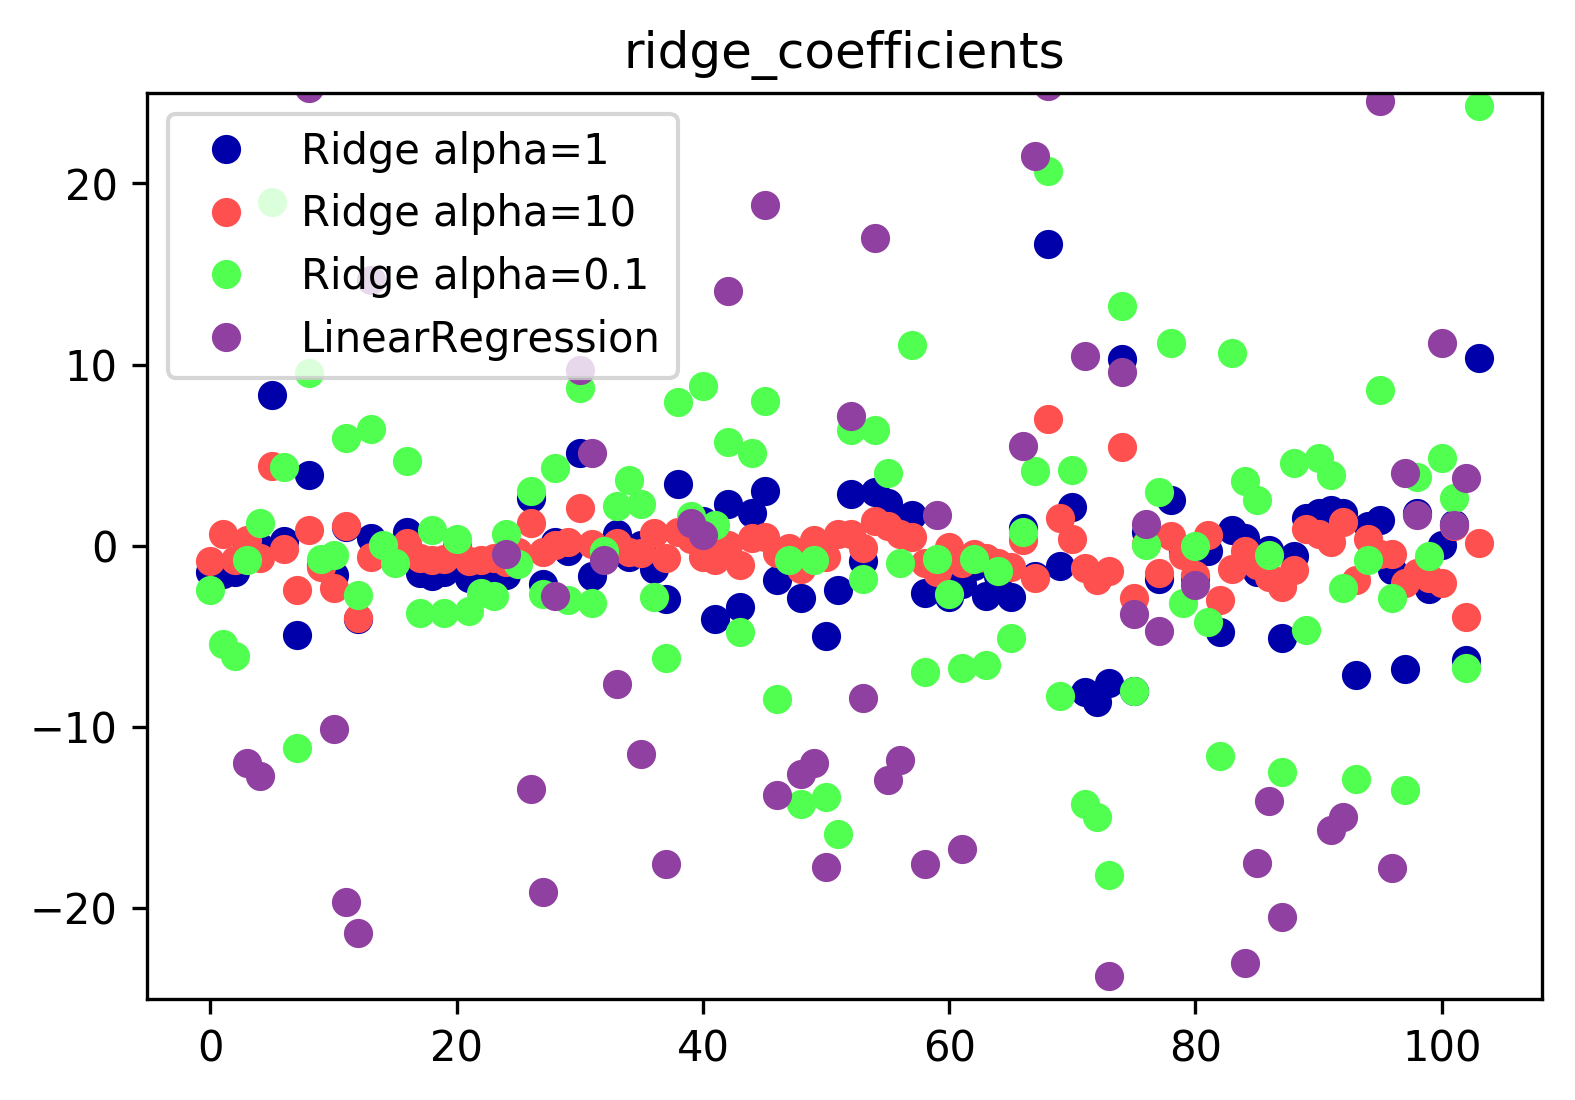

In [30]:
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()
plt.show()

### Lasso

In [32]:
from sklearn.linear_model import Lasso

# The default lasso model
lasso = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))

training set score: 0.293238
test set score: 0.209375
number of features used: 4


In [33]:
# Finetuning the lasso model's alpha value for a better R^2 score

lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("training set score: %f" % lasso001.score(X_train, y_train))
print("test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))

training set score: 0.896408
test set score: 0.767806
number of features used: 32


/Users/davidtan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [35]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("training set score: %f" % lasso00001.score(X_train, y_train))
print("test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))

training set score: 0.942433
test set score: 0.695635
number of features used: 100


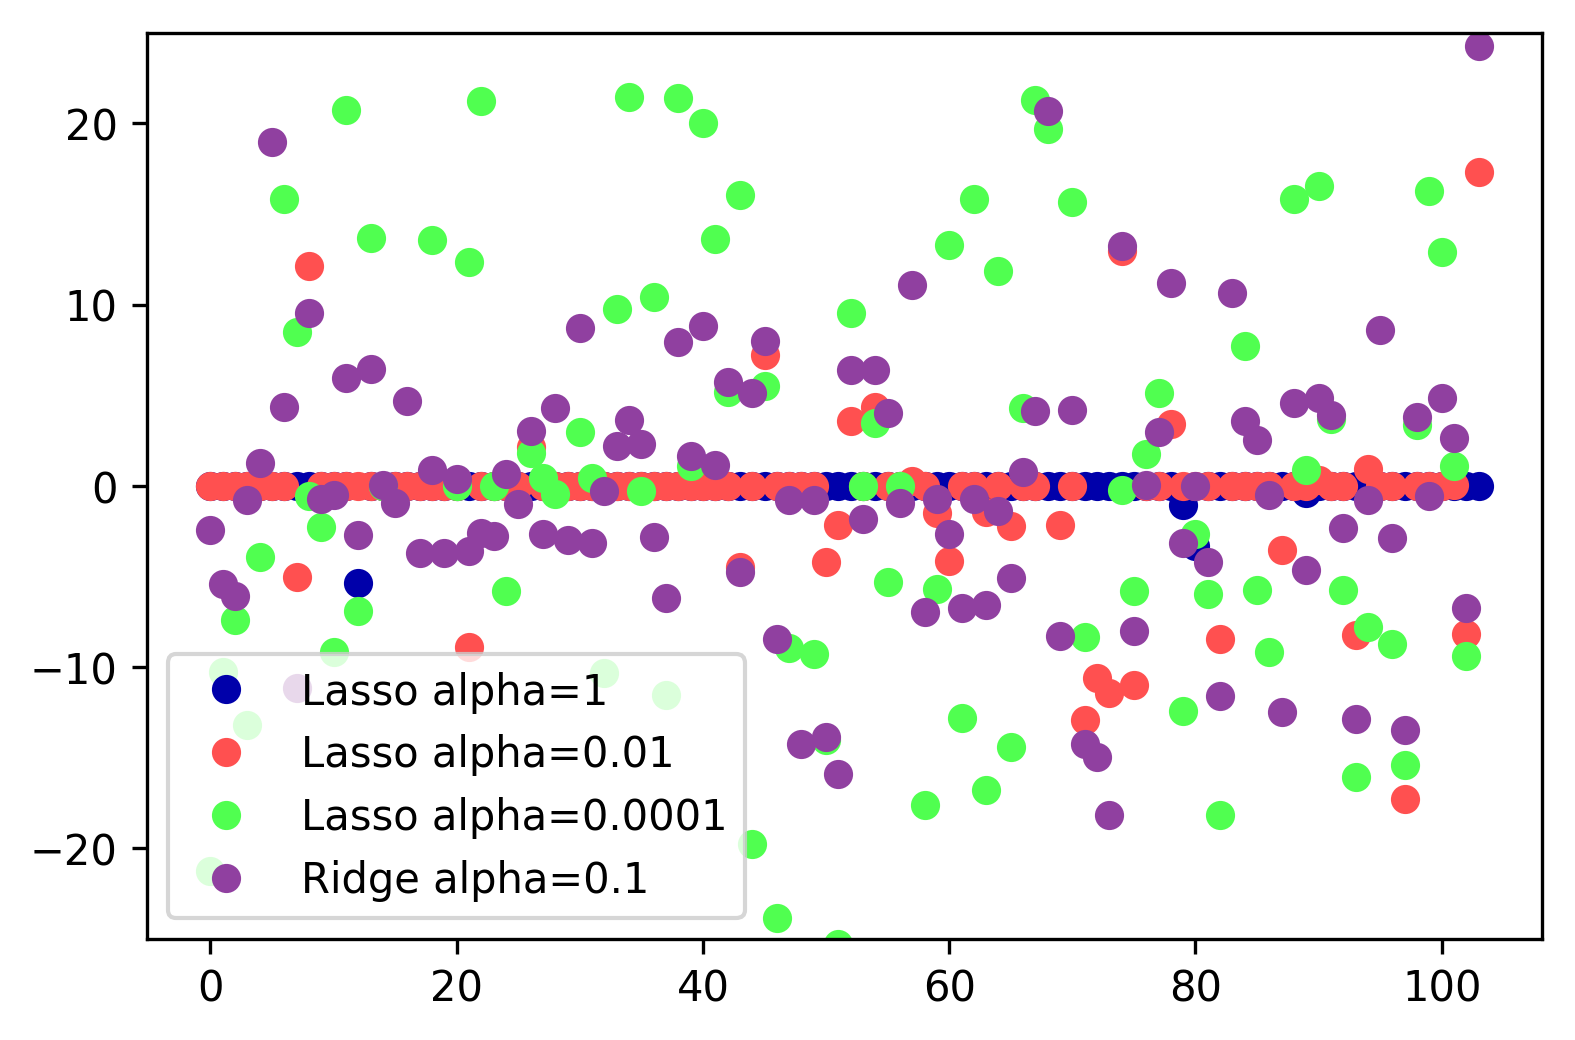

In [38]:
# Comparing Lasso and Ridge
plt.plot(lasso.coef_, 'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()
plt.show()